## Zadanie 1

Format plików ARFF służy do zapisywania zbiorów danych używanych w środowisku Weka.
Każdy plik ARFF składa się z dwóch głównych części: nagłówka oraz danych.
W nagłówku, za pomocą dyrektywy @relation, podana jest nazwa zbioru danych. Następnie, linie rozpoczynające się od @attribute definiują atrybuty – ich nazwy oraz możliwe typy lub wartości.
Po dyrektywie @data znajdują się kolejne linie z danymi – każda linia to jeden przykład uczący, zawierający wartości atrybutów w takiej kolejności, w jakiej zostały zadeklarowane powyżej.
Pliki ARFF mogą być wykorzystywane zarówno do trenowania modeli, jak i do przechowywania wyników eksperymentów.

## Zadanie 2

Klasa Iris-setosa (w Wece oznaczana ciemnoniebieskim kolorem) jest najłatwiejsza do odróżnienia od pozostałych.
Wynika to z atrybutu petallength, którego wartości dla wszystkich przykładów tej klasy (i tylko tej klasy) są mniejsze niż 2.

## Zadanie 3

Zarówno algorytm JRip, jak i PART wygenerowały po trzy reguły – po jednej dla każdej z klas.
W obu przypadkach reguła przypisana klasie Iris-setosa wykorzystuje tylko jeden atrybut, reguła dla Iris-versicolor opiera się na dwóch atrybutach, natomiast przykłady należące do klasy Iris-virginica to te, które nie spełniają żadnej z wcześniejszych reguł.
Trafność obu modeli jest bardzo zbliżona:
JRip – 95,33%, PART – 94% (różnica wynika z dwóch przykładów uczących).

## Zadanie 4

Zmniejszenie parametru confidenceFactor nie wpłynęło istotnie na trafność klasyfikacji.
Wartość trafności spadła jedynie nieznacznie – z 91,93% do 91,32% – co według adnotacji Weki zostało oznaczone jako równie dobry wynik (0/1/0).
Wszystkie pozostałe porównywane wartości z listy również uzyskały taki sam status: (0/1/0), co oznacza brak istotnej różnicy w jakości klasyfikacji.

## Zadanie 5

Po przekierowaniu strumienia tekstowego z modułu ClassifierPerformanceEvaluator, w oknie TextViewer oprócz zakładki Classifier model pojawia się także zakładka Evaluation result.
Zawiera ona podsumowanie wyników uzyskanych przez model w różnych metrykach oceny jakości klasyfikacji, a także przedstawia macierz pomyłek, która pokazuje liczbę poprawnych i błędnych klasyfikacji dla każdej klasy.

## Zadanie 6

W przypadku analizowanych danych z pliku, klasa decyzyjna przyjmuje wartości numeryczne, co powoduje błąd przy użyciu niektórych klasyfikatorów.
Algorytmy J48 i PART zgłaszają błąd:
weka.core.UnsupportedAttributeTypeException: weka.classifiers.trees.J48: Cannot handle numeric class!
Algorytm ZeroR przewiduje średnią wartość klasy, która wynosi 461.

Regresja liniowa w środowisku Weka osiągnęła w kroswalidacji średni błąd absolutny równy 200.
Dla regresji liniowej z biblioteki scikit-learn ten błąd wyniósł 198.

Sieć RBF z Weki uzyskała w kroswalidacji średni błąd absolutny równy 184.
Tradycyjna sieć neuronowa ze scikit-learn osiągnęła:
- 222 przy 250 iteracjach,
- 180 przy 1000 iteracjach,
- 165 przy 2000 iteracjach.

## Zadanie 7

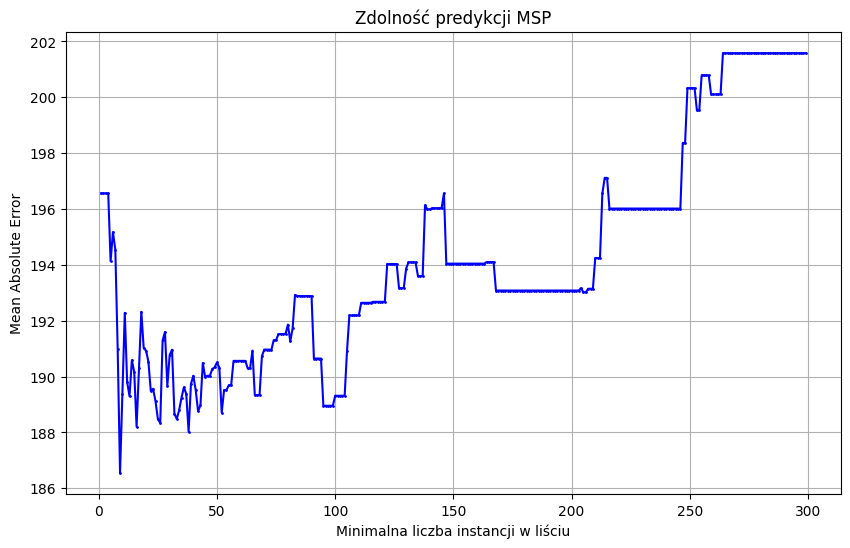

In [1]:
import matplotlib.pyplot as plt
import csv

parametry = []
wyniki = []

with open('results.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        if len(row) >= 2:
            parametry.append(int(row[0]))
            wyniki.append(float(row[1].replace(',', '.')))

plt.figure(figsize=(10, 6))
plt.plot(parametry, wyniki, marker='o', markersize=1, linestyle='-', color='b')
plt.title('Zdolność predykcji MSP')
plt.xlabel('Minimalna liczba instancji w liściu')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


Klasyfikator M5 osiągnął średni błąd absolutny (MAE) na poziomie 193, co jest wynikiem bardzo zbliżonym do sieci RBF i znacząco lepszym od regresji liniowej. Aby zbadać wpływ minimalnej liczby instancji w liściu, przeanalizowano wartości tego parametru w zakresie od 1 do 300. Załączony wykres ilustruje zależność średniego błędu absolutnego od wartości parametru. Najniższy wynik MAE, wynoszący 186,5408, uzyskano dla minNumberInstances = 9. Wartość MAE wykazuje duże wahania w zakresie od 0 do 100, po czym stabilizuje się na poziomie 193, a następnie zaczyna systematycznie rosnąć przy wartościach parametru przekraczających 200.